## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_excel('Dummy Dataset for Challenge #1.xlsx')

In [3]:
data.head(10)

,Period,City,Channel,Category,Segment,Manufacturer,Brand,Item Name,Pack_Size,Packaging,Unit_Price,Sales_Volume(KG_LTRS),Sales_Value
0,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,ALYSSA,ALYSSA SPAGHETTI 200G SACHET,200G,SACHET,89.0625,66795.658,2.128648e+07
1,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN SUPERIOR QUALITY FOOD PASTA 200G SACHET,200G,SACHET,99.7500,72729.168,2.658084e+07
2,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN VERMICELLI 200G SACHET,200G,SACHET,99.7500,56039.689,2.048124e+07
3,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN 1.1 SPAGHETTI 200G SACHET,200G,SACHET,99.7500,18220.535,6.659200e+06
4,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN 1.5 SPAGHETTI 200G SACHET,200G,SACHET,99.7500,376047.594,1.363817e+08
5,2021-01-01,Abidjan,Groceries,PASTA,DRY PASTA,CAPRA,ALYSSA,ALYSSA SPAGHETTI 200G SACHET,200G,SACHET,85.5000,32284.440,1.011361e+07
6,2021-01-01,Abidjan,Groceries,PASTA,DRY PASTA,CAPRA,BLE D'OR,BLE D'OR 200G SACHET,200G,SACHET,71.2500,114573.356,2.990997e+07
7,2021-01-01,Abidjan,Groceries,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN SUPERIOR QUALITY FOOD PASTA 200G SACHET,200G,SACHET,99.7500,48512.832,1.773034e+07
8,2021-01-01,Abidjan,Groceries,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN 1.5 SPAGHETTI 200G SACHET,200G,SACHET,99.7500,168740.140,6.167075e+07
9,2021-01-01,Abidjan,Open_Market,PASTA,DRY PASTA,CAPRA,ALYSSA,ALYSSA SPAGHETTI 200G SACHET,200G,SACHET,85.5000,16338.779,5.118378e+06


In [4]:
data.describe()

,Period,Unit_Price,Sales_Volume(KG_LTRS),Sales_Value
count,1399,1399.000000,1399.000000,1.399000e+03
mean,2021-12-21 21:25:36.240171520,268.460696,26412.677862,1.059318e+07
min,2021-01-01 00:00:00,71.250000,0.000000,0.000000e+00
25%,2021-07-01 00:00:00,99.750000,2923.001000,1.060202e+06
50%,2021-12-01 00:00:00,114.000000,8701.368000,3.495150e+06
75%,2022-07-01 00:00:00,199.500000,25950.046500,1.021645e+07
max,2022-12-01 00:00:00,2565.000000,380502.987000,1.389422e+08
std,NaN,456.925373,47036.868116,1.911985e+07


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Period                 1399 non-null   datetime64[ns]
 1   City                   1399 non-null   object        
 2   Channel                1399 non-null   object        
 3   Category               1399 non-null   object        
 4   Segment                1399 non-null   object        
 5   Manufacturer           1399 non-null   object        
 6   Brand                  1399 non-null   object        
 7   Item Name              1399 non-null   object        
 8   Pack_Size              1399 non-null   object        
 9   Packaging              1399 non-null   object        
 10  Unit_Price             1399 non-null   float64       
 11  Sales_Volume(KG_LTRS)  1399 non-null   float64       
 12  Sales_Value            1399 non-null   float64       
dtypes: 

In [6]:
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [7]:
data_encoded = pd.get_dummies(data, columns=['City', 'Channel'])

In [8]:
# Convert 'Period' to datetime and extract quarter
data['Period'] = pd.to_datetime(data['Period'], format='%b-%y')

In [202]:
total_sales_by_city = data.groupby('City')['Sales_Value'].sum().reset_index()
print(total_sales_by_city)

      City   Sales_Value
0  Abidjan  1.351485e+10
1   Bouake  1.305006e+09


In [203]:
 # Average sales value per unit sold
data['total_units_sold'] = data['Sales_Value'] / data['Unit_Price']

In [204]:
# Total sales value aggregated by period
data['total_sales_value_per_period'] = data.groupby('Period')['Sales_Value'].transform('sum')

In [205]:
# Combined sales value grouped by city and channel
data['sales_value_by_city_and_channel'] = data.groupby(['City', 'Channel'])['Sales_Value'].transform('sum')

In [206]:
# Combined sales volume grouped by city and channel
data['sales_volume_by_city_and_channel'] = data.groupby(['City', 'Channel'])['Sales_Volume(KG_LTRS)'].transform('sum')

In [207]:
data['sales_volume_by_category'] = data.groupby('Category')['Sales_Volume(KG_LTRS)'].transform('sum')

In [208]:
data['sales_value_by_category'] = data.groupby('Category')['Sales_Value'].transform('sum')

In [209]:
data['sales_volume_by_segment'] = data.groupby('Segment')['Sales_Volume(KG_LTRS)'].transform('sum')

In [210]:
data['sales_value_by_segment'] = data.groupby('Segment')['Sales_Value'].transform('sum')

In [211]:
# Combined sales value grouped by category and segment
data['sales_value_by_category_and_segment'] = data.groupby(['Category', 'Segment'])['Sales_Value'].transform('sum')

In [212]:
# Combined sales volume grouped by category and segment
data['sales_volume_by_category_and_segment'] = data.groupby(['Category', 'Segment'])['Sales_Volume(KG_LTRS)'].transform('sum')

In [213]:
data['sales_volume_by_manufacturer'] = data.groupby('Manufacturer')['Sales_Volume(KG_LTRS)'].transform('sum')

In [214]:
data['sales_value_by_manufacturer'] = data.groupby('Manufacturer')['Sales_Value'].transform('sum')

In [215]:
# Average unit price grouped by brand
data['average_unit_price_by_brand'] = data.groupby('Brand')['Unit_Price'].transform('mean')

In [216]:
# Total sales volume for each period, city, channel, category, or segment
data['total_sales_volume'] = data.groupby(['Period', 'City', 'Channel', 'Category', 'Segment'])['Sales_Volume(KG_LTRS)'].transform('sum')

In [217]:
# Total sales value for each period, city, channel, category, or segment
data['total_sales_value'] = data.groupby(['Period', 'City', 'Channel', 'Category', 'Segment'])['Sales_Value'].transform('sum')

In [218]:
data['sales_performance_by_manufacturer_and_city'] = data.groupby(['Manufacturer', 'City'])['Sales_Value'].transform('sum')

In [219]:
data['sales_performance_by_brand_and_channel'] = data.groupby(['Brand', 'Channel'])['Sales_Value'].transform('sum')

In [220]:
# Category_Segment
data['Category_Segment'] = data['Category'] + '_' + data['Segment']

In [221]:
# Brand_Item Name
data['Brand_ItemName'] = data['Brand'] + '_' + data['Item Name']

In [222]:
# CityChannel 
data['City_Channel'] = data['City'] + '_' + data['Channel']

In [223]:
# PackSize_Packaging
data['PackSize_Packaging'] = data['Pack_Size'] + '_' + data['Packaging']

In [224]:
# Create 'Year_Month' column by combining year and month
data['Year_Month'] = data['Period'].dt.strftime('%Y-%m')

# Sales_Rank by YearMonth and Sales_Value
data['Sales_Rank'] = data.groupby('Year_Month')['Sales_Value'].rank(ascending=False, method='dense')

In [225]:
# Volume_Description
data['Volume_Description'] = pd.qcut(data['Sales_Volume(KG_LTRS)'], q=5, labels=['Very_Low', 'Low', 'Medium', 'High', 'Very_High'])

In [226]:
# Save the updated dataset
data.to_excel('Last_Dummy Dataset for Challenge #1.xlsx', index=False)

In [227]:
data.head(10)

,Period,City,Channel,Category,Segment,Manufacturer,Brand,Item Name,Pack_Size,Packaging,...,total_sales_value,sales_performance_by_manufacturer_and_city,sales_performance_by_brand_and_channel,Category_Segment,Brand_ItemName,City_Channel,PackSize_Packaging,Year_Month,Sales_Rank,Volume_Description
0,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,ALYSSA,ALYSSA SPAGHETTI 200G SACHET,200G,SACHET,...,2.113895e+08,1.333490e+10,5.898865e+08,PASTA_DRY PASTA,ALYSSA_ALYSSA SPAGHETTI 200G SACHET,Abidjan_Boutique,200G_SACHET,2021-01,8.0,Very_High
1,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN SUPERIOR QUALITY FOOD PASTA 200G SACHET,200G,SACHET,...,2.113895e+08,1.333490e+10,5.192649e+09,PASTA_DRY PASTA,MAMAN_MAMAN SUPERIOR QUALITY FOOD PASTA 20...,Abidjan_Boutique,200G_SACHET,2021-01,7.0,Very_High
2,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN VERMICELLI 200G SACHET,200G,SACHET,...,2.113895e+08,1.333490e+10,5.192649e+09,PASTA_DRY PASTA,MAMAN_MAMAN VERMICELLI 200G SACHET,Abidjan_Boutique,200G_SACHET,2021-01,9.0,Very_High
3,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN 1.1 SPAGHETTI 200G SACHET,200G,SACHET,...,2.113895e+08,1.333490e+10,5.192649e+09,PASTA_DRY PASTA,MAMAN_MAMAN 1.1 SPAGHETTI 200G SACHET,Abidjan_Boutique,200G_SACHET,2021-01,15.0,High
4,2021-01-01,Abidjan,Boutique,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN 1.5 SPAGHETTI 200G SACHET,200G,SACHET,...,2.113895e+08,1.333490e+10,5.192649e+09,PASTA_DRY PASTA,MAMAN_MAMAN 1.5 SPAGHETTI 200G SACHET,Abidjan_Boutique,200G_SACHET,2021-01,1.0,Very_High
5,2021-01-01,Abidjan,Groceries,PASTA,DRY PASTA,CAPRA,ALYSSA,ALYSSA SPAGHETTI 200G SACHET,200G,SACHET,...,1.194247e+08,1.333490e+10,2.644451e+08,PASTA_DRY PASTA,ALYSSA_ALYSSA SPAGHETTI 200G SACHET,Abidjan_Groceries,200G_SACHET,2021-01,12.0,High
6,2021-01-01,Abidjan,Groceries,PASTA,DRY PASTA,CAPRA,BLE D'OR,BLE D'OR 200G SACHET,200G,SACHET,...,1.194247e+08,1.333490e+10,8.303928e+08,PASTA_DRY PASTA,BLE D'OR_BLE D'OR 200G SACHET,Abidjan_Groceries,200G_SACHET,2021-01,6.0,Very_High
7,2021-01-01,Abidjan,Groceries,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN SUPERIOR QUALITY FOOD PASTA 200G SACHET,200G,SACHET,...,1.194247e+08,1.333490e+10,2.661289e+09,PASTA_DRY PASTA,MAMAN_MAMAN SUPERIOR QUALITY FOOD PASTA 20...,Abidjan_Groceries,200G_SACHET,2021-01,10.0,Very_High
8,2021-01-01,Abidjan,Groceries,PASTA,DRY PASTA,CAPRA,MAMAN,MAMAN 1.5 SPAGHETTI 200G SACHET,200G,SACHET,...,1.194247e+08,1.333490e+10,2.661289e+09,PASTA_DRY PASTA,MAMAN_MAMAN 1.5 SPAGHETTI 200G SACHET,Abidjan_Groceries,200G_SACHET,2021-01,2.0,Very_High
9,2021-01-01,Abidjan,Open_Market,PASTA,DRY PASTA,CAPRA,ALYSSA,ALYSSA SPAGHETTI 200G SACHET,200G,SACHET,...,1.692917e+08,1.333490e+10,1.611618e+08,PASTA_DRY PASTA,ALYSSA_ALYSSA SPAGHETTI 200G SACHET,Abidjan_Open_Market,200G_SACHET,2021-01,17.0,High


In [228]:
missing_values = data.isnull().sum()
print(missing_values)

Period                                        0
City                                          0
Channel                                       0
Category                                      0
Segment                                       0
Manufacturer                                  0
Brand                                         0
Item Name                                     0
Pack_Size                                     0
Packaging                                     0
Unit_Price                                    0
Sales_Volume(KG_LTRS)                         0
Sales_Value                                   0
Quarter                                       0
total_units_sold                              0
total_sales_value_per_period                  0
sales_value_by_city_and_channel               0
sales_volume_by_city_and_channel              0
sales_volume_by_category                      0
sales_value_by_category                       0
sales_volume_by_segment                 

## Insightful Visualizations

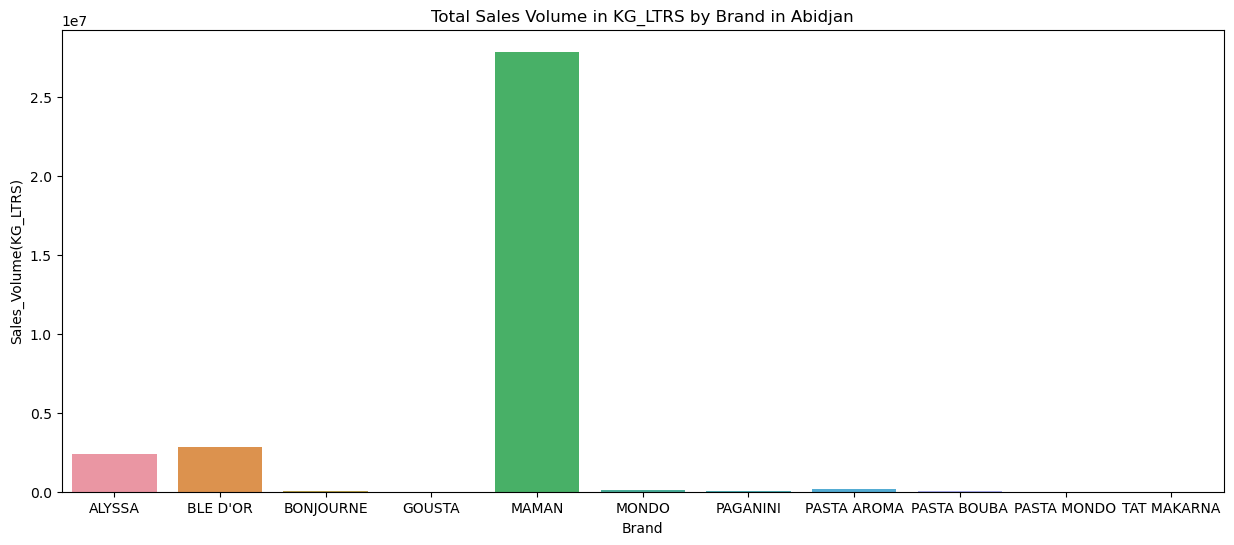

In [229]:
# Visualization 1: Total Sales Volume by Brand in Abidjan
plt.figure(figsize=(15, 6))
abidjan_data = data[data['City'] == 'Abidjan']
total_sales_by_brand = abidjan_data.groupby('Brand')['Sales_Volume(KG_LTRS)'].sum().reset_index()
sns.barplot(data=total_sales_by_brand, x='Brand', y='Sales_Volume(KG_LTRS)')
plt.title('Total Sales Volume in KG_LTRS by Brand in Abidjan')
plt.show()

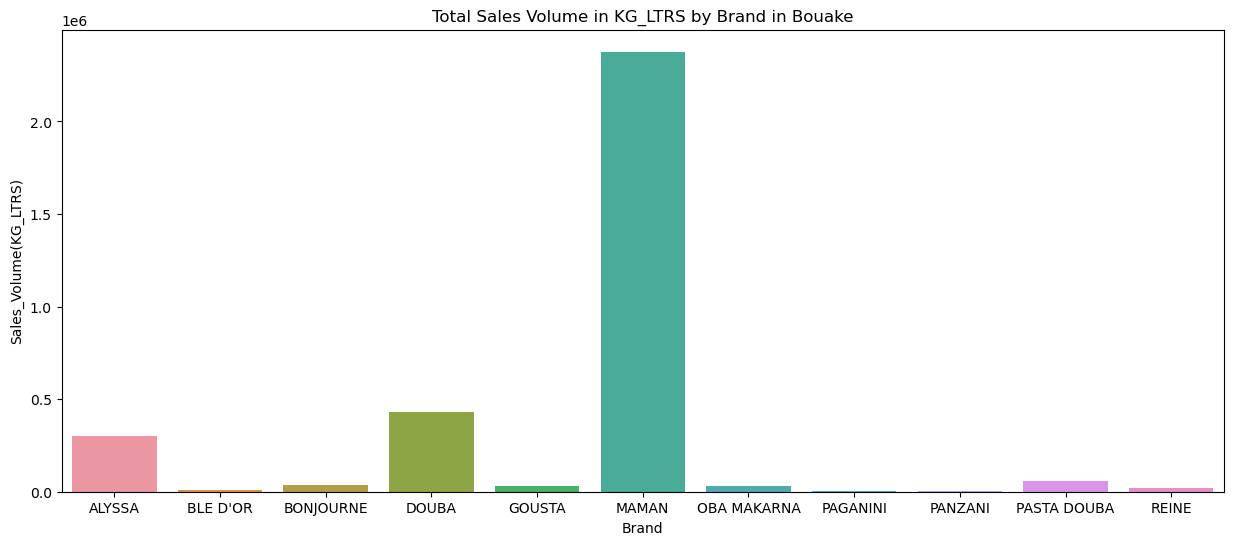

In [230]:
# Visualization 1: Total Sales Volume by Brand in Bouake  
plt.figure(figsize=(15, 6))
Bouake_data = data[data['City'] == 'Bouake']
total_sales_by_brand = Bouake_data.groupby('Brand')['Sales_Volume(KG_LTRS)'].sum().reset_index()
sns.barplot(data=total_sales_by_brand, x='Brand', y='Sales_Volume(KG_LTRS)')
plt.title('Total Sales Volume in KG_LTRS by Brand in Bouake')
plt.show()

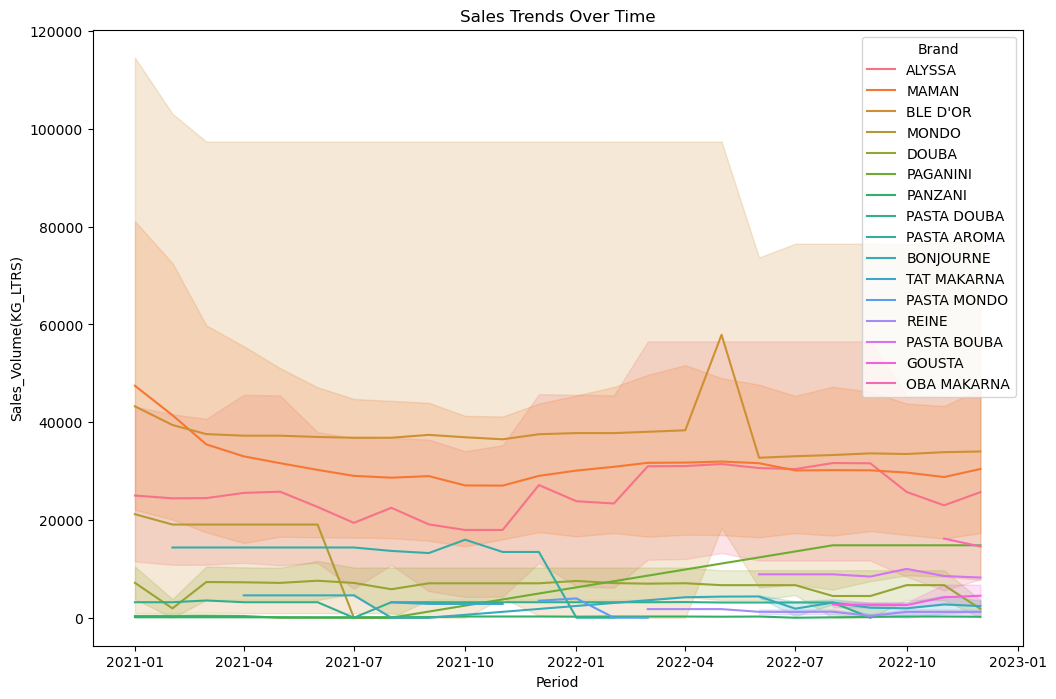

In [231]:
# Visualization 2: Sales Trends Over Time
plt.figure(figsize=(12, 8))
sns.lineplot(data, x='Period', y='Sales_Volume(KG_LTRS)', hue='Brand')
plt.title('Sales Trends Over Time')
plt.show()

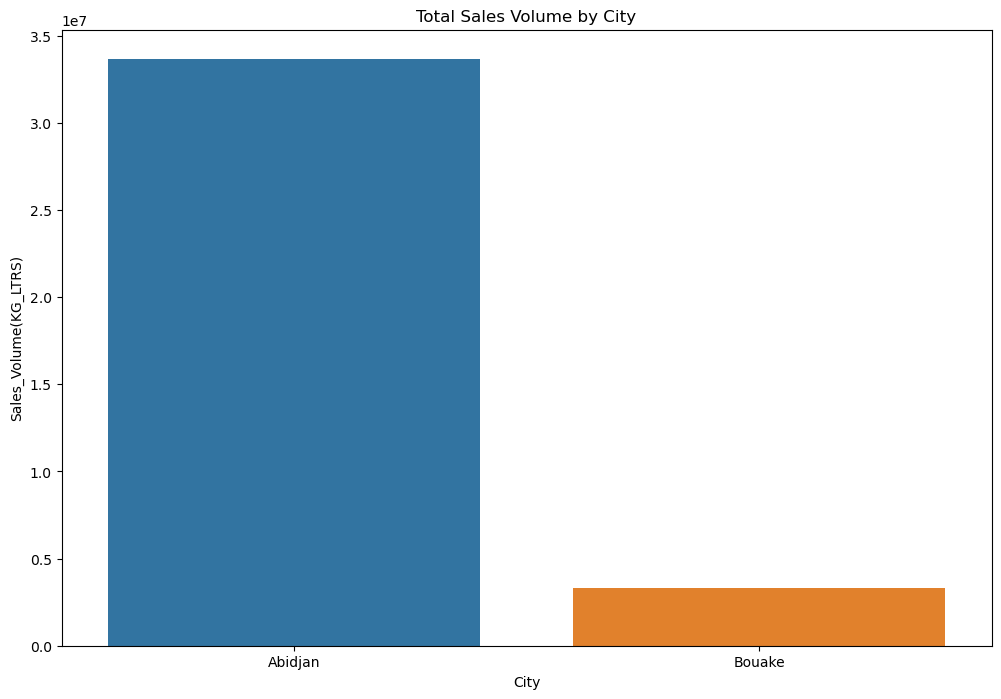

In [232]:
# Visualization 3: City-Wise Sales Performance
plt.figure(figsize=(12, 8))
total_sales_by_city = data.groupby('City')['Sales_Volume(KG_LTRS)'].sum().reset_index()
sns.barplot(data=total_sales_by_city, x='City', y='Sales_Volume(KG_LTRS)')
plt.title('Total Sales Volume by City')
plt.show()

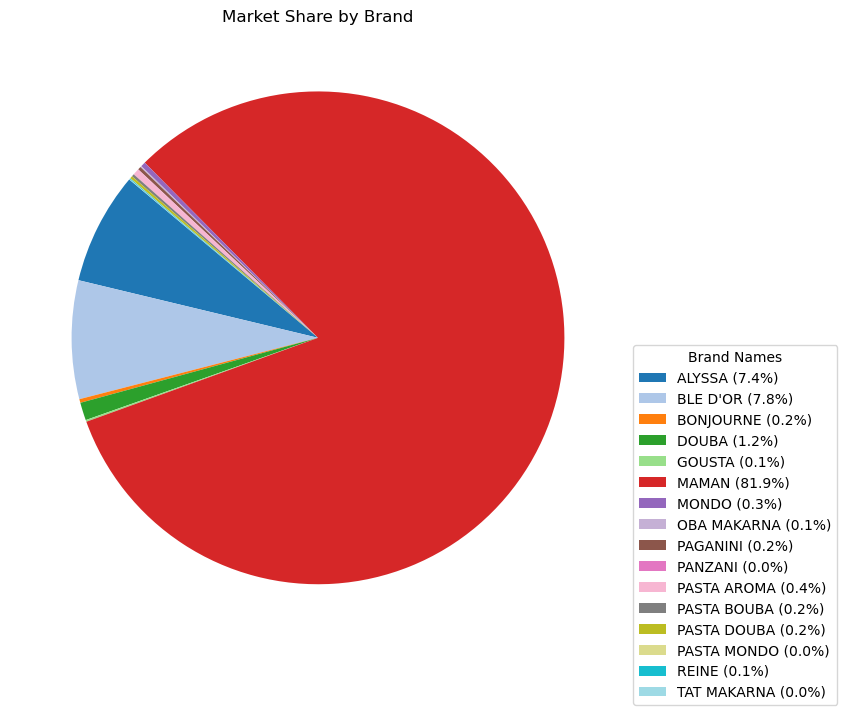

In [233]:
# Visualization 3 Market Share by Brand
plt.figure(figsize=(8, 8))
market_share_by_brand = data.groupby('Brand')['Sales_Volume(KG_LTRS)'].sum()

# Define a custom color palette with 15 colors
colors = plt.cm.tab20(np.linspace(0, 1, len(market_share_by_brand)))

wedges, texts = plt.pie(market_share_by_brand, colors=colors, startangle=140)

# Calculate percentages manually
total = sum(market_share_by_brand)
percentages = [(value / total) * 100 for value in market_share_by_brand]

# Add a legend with brand names and percentages
plt.legend(handles=wedges, labels=[f'{label} ({percentage:.1f}%)' for label, percentage in zip(market_share_by_brand.index, percentages)],
           loc='best', title='Brand Names', bbox_to_anchor=(1, 0.5))

plt.title('Market Share by Brand')
plt.show()

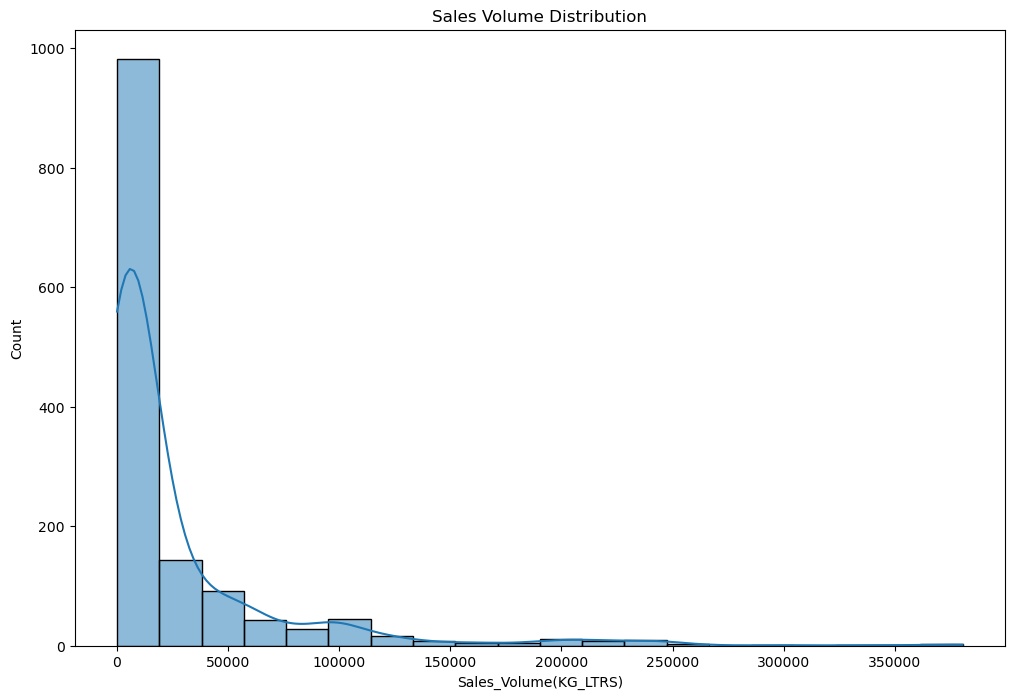

In [234]:
# Visualization 9: Sales Volume Distribution
plt.figure(figsize=(12, 8))
sns.histplot(data, x='Sales_Volume(KG_LTRS)', bins=20, kde=True)
plt.title('Sales Volume Distribution')
plt.show()

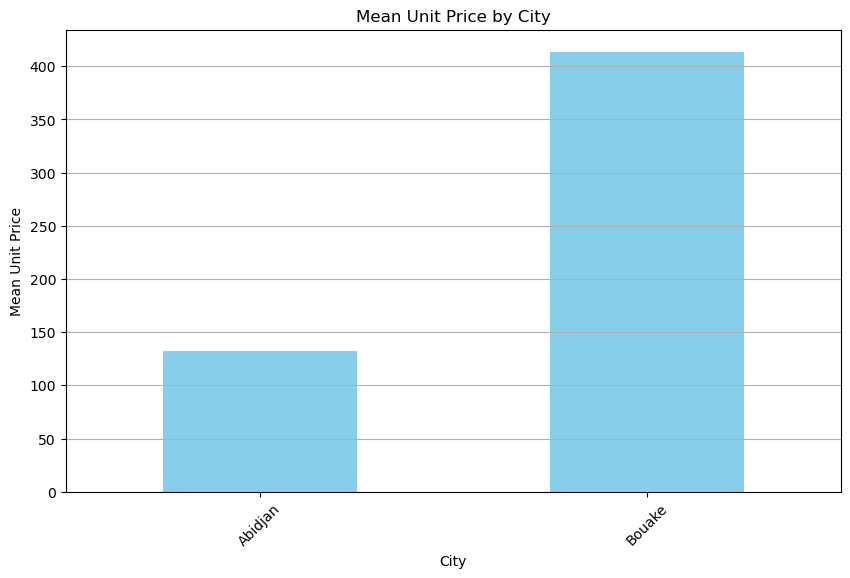

In [235]:
mean_prices = data.groupby('City')['Unit_Price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Mean Unit Price by City')
plt.xlabel('City')
plt.ylabel('Mean Unit Price')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

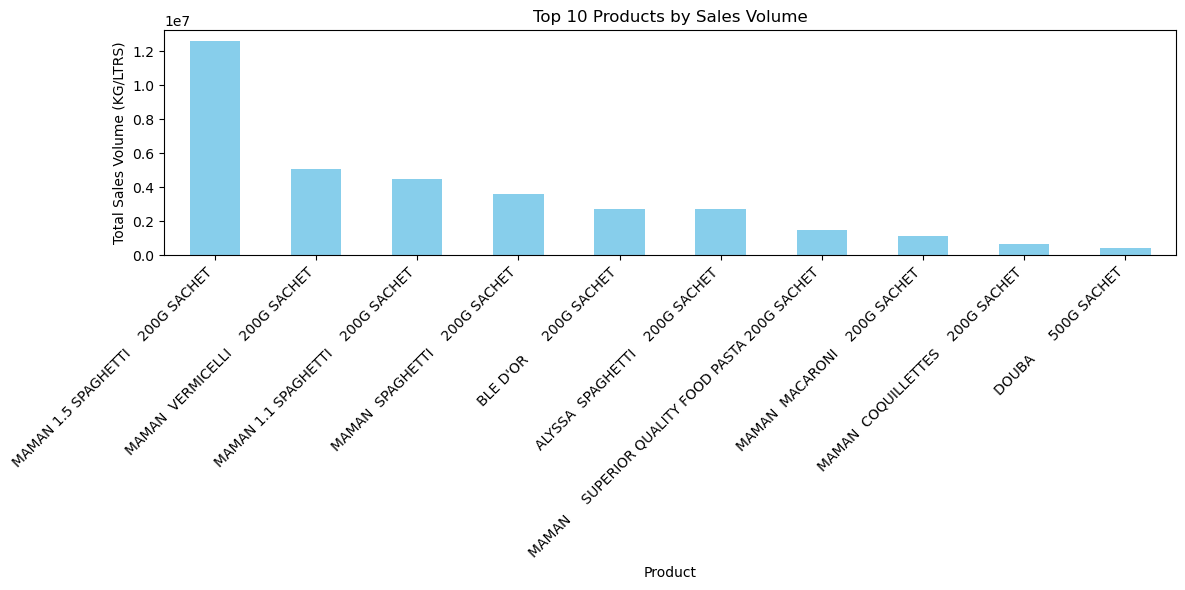

In [236]:
#Top-Performing Products

# Aggregate sales volume by item
top_products = data.groupby('Item Name')['Sales_Volume(KG_LTRS)'].sum().sort_values(ascending=False).head(10)

# Bar chart for top 10 products
plt.figure(figsize=(12, 6))
ax = top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('Product')
plt.ylabel('Total Sales Volume (KG/LTRS)')
ax.set_xticklabels(top_products.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

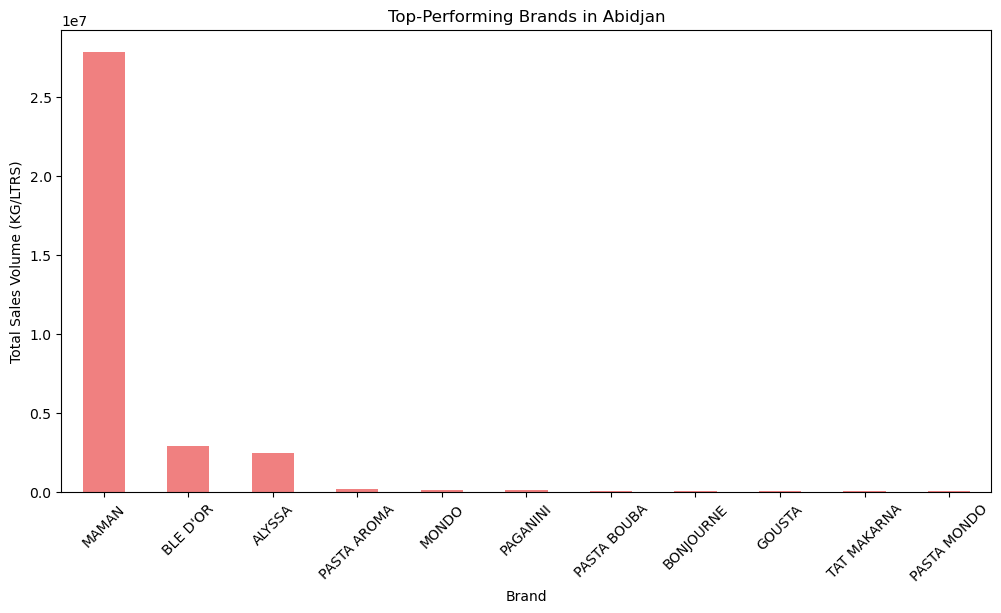

In [237]:
#Top-Performing Brands in Abidjan

# Aggregate sales volume by brand in Abidjan
abidjan_sales = data[data['City'] == 'Abidjan'].groupby('Brand')['Sales_Volume(KG_LTRS)'].sum().sort_values(ascending=False)

# Bar chart for top-performing brands in Abidjan
plt.figure(figsize=(12, 6))
abidjan_sales.plot(kind='bar', color='lightcoral')
plt.title('Top-Performing Brands in Abidjan')
plt.xlabel('Brand')
plt.ylabel('Total Sales Volume (KG/LTRS)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

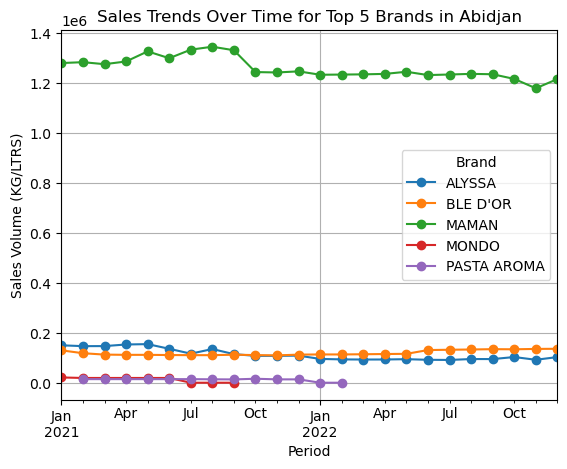

In [238]:
#Sales Trends Over Time

# Convert Period column to datetime format
data['Period'] = pd.to_datetime(data['Period'])

# Aggregate sales volume over time for top 5 brands
top_brands = abidjan_sales.head(5).index
sales_trends = data[data['Brand'].isin(top_brands)].groupby(['Period', 'Brand'])['Sales_Volume(KG_LTRS)'].sum().unstack()

# Sales Trends Over Time
plt.figure(figsize=(12, 6))
sales_trends.plot(kind='line', marker='o')
plt.title('Sales Trends Over Time for Top 5 Brands in Abidjan')
plt.xlabel('Period')
plt.ylabel('Sales Volume (KG/LTRS)')
plt.legend(title='Brand')
plt.grid(True)
plt.show()

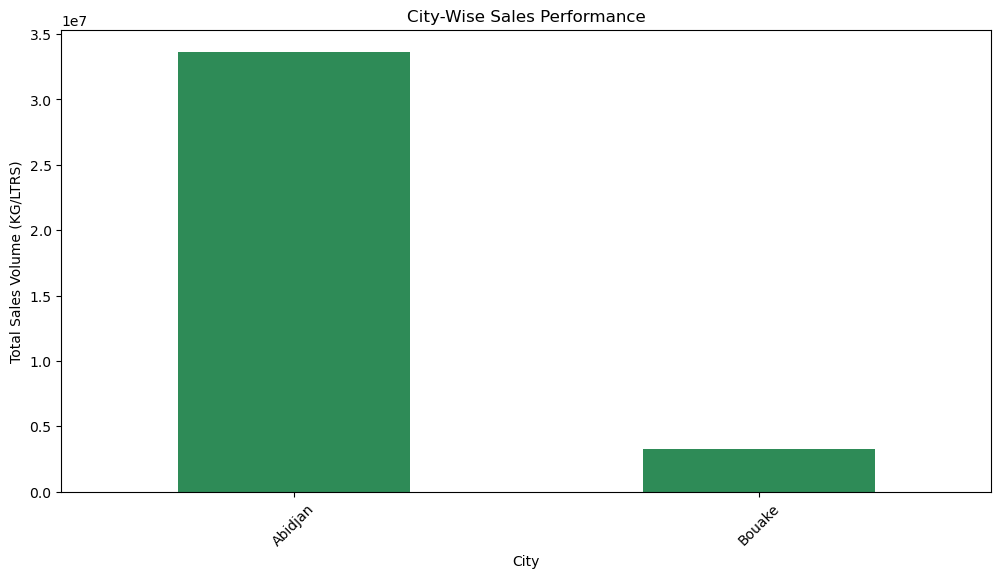

In [239]:

#City-Wise Sales Performance
# Aggregate sales volume by city
city_sales = data.groupby('City')['Sales_Volume(KG_LTRS)'].sum().sort_values(ascending=False)

# Bar chart for city-wise sales performance
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', color='seagreen')
plt.title('City-Wise Sales Performance')
plt.xlabel('City')
plt.ylabel('Total Sales Volume (KG/LTRS)')
plt.xticks(rotation=45)
plt.show()

(array([0, 1]), [Text(0, 0, 'Abidjan'), Text(1, 0, 'Bouake')])

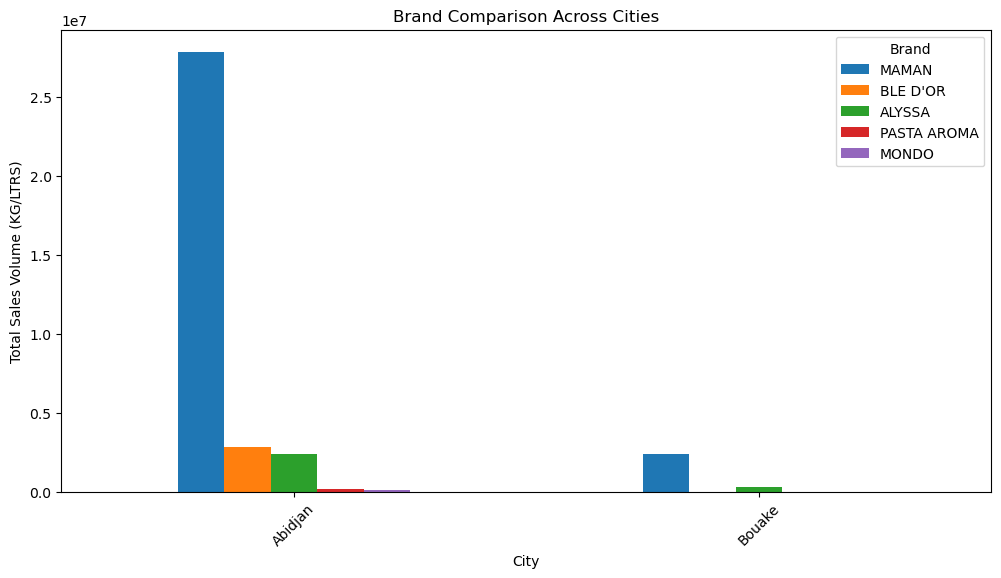

In [240]:
# Aggregate sales volume by city and brand
city_brand_sales = data.groupby(['City', 'Brand'])['Sales_Volume(KG_LTRS)'].sum().unstack()

# Filter for top 5 brands in Abidjan
abidjan_sales = data[data['City'] == 'Abidjan'].groupby('Brand')['Sales_Volume(KG_LTRS)'].sum().sort_values(ascending=False)
top_5_brands = abidjan_sales.head(5).index
city_brand_sales = city_brand_sales[top_5_brands]

# Grouped bar chart for brand comparison across cities
city_brand_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Brand Comparison Across Cities')
plt.xlabel('City')
plt.ylabel('Total Sales Volume (KG/LTRS)')
plt.xticks(rotation=45)

<Figure size 1200x600 with 0 Axes>

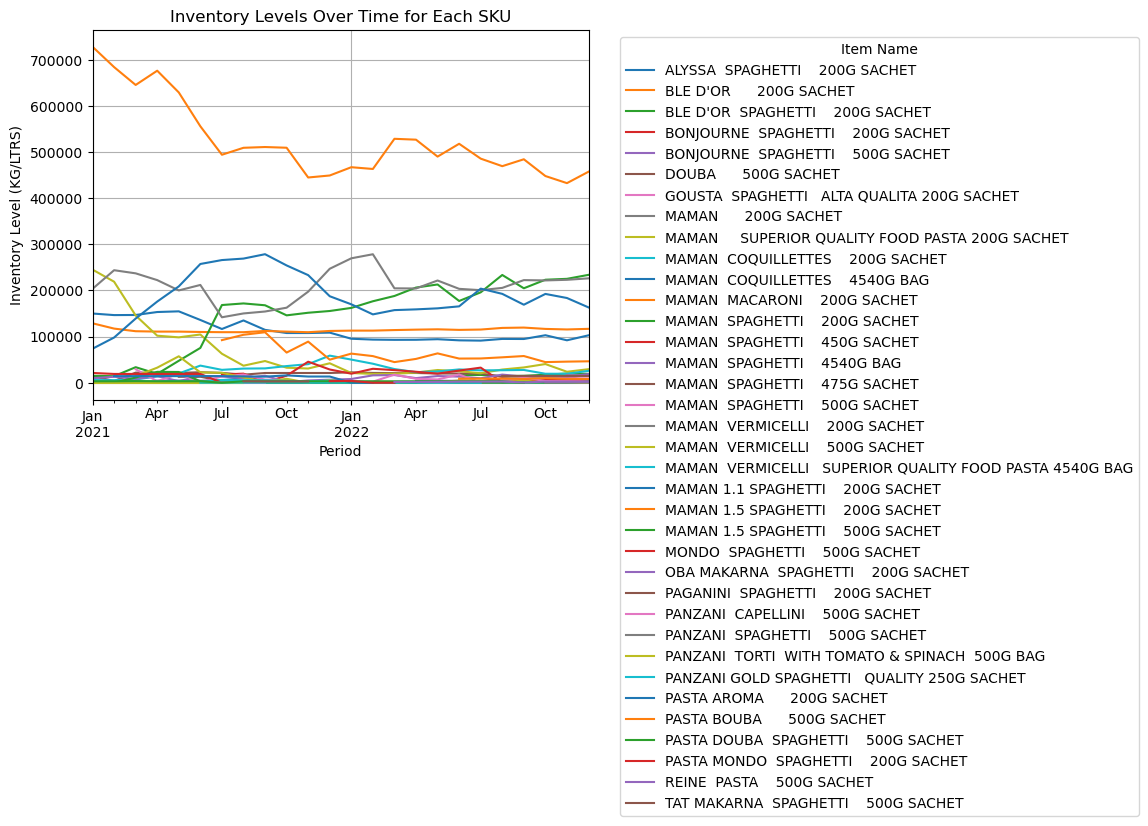

In [241]:
#Line chart showing inventory levels over time for each SKU.
# Aggregate inventory levels by period and item
inventory_levels = data.groupby(['Period', 'Item Name'])['Sales_Volume(KG_LTRS)'].sum().unstack()

# Line chart for inventory levels over time
plt.figure(figsize=(12, 6))
inventory_levels.plot(kind='line')
plt.title('Inventory Levels Over Time for Each SKU')
plt.xlabel('Period')
plt.ylabel('Inventory Level (KG/LTRS)')
plt.legend(title='Item Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

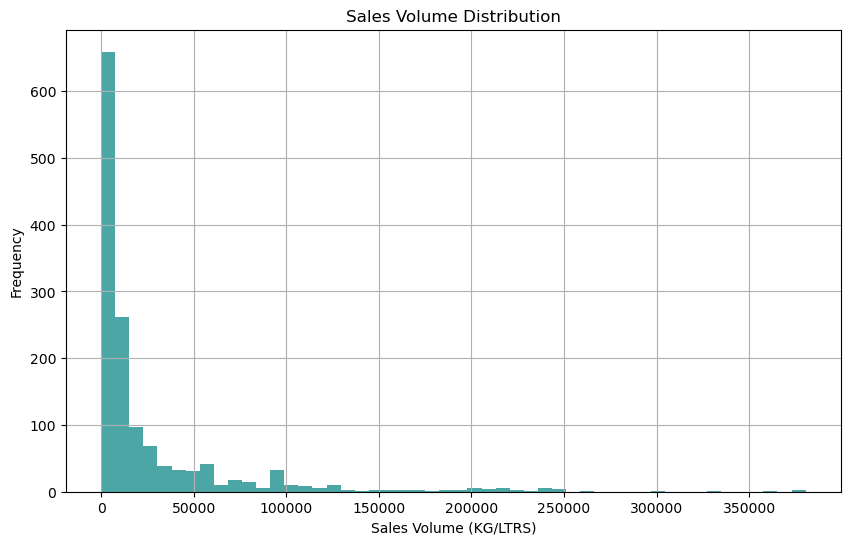

In [242]:
# Histogram for sales volume distribution
plt.figure(figsize=(10, 6))
data['Sales_Volume(KG_LTRS)'].plot(kind='hist', bins=50, color='teal', alpha=0.7)
plt.title('Sales Volume Distribution')
plt.xlabel('Sales Volume (KG/LTRS)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

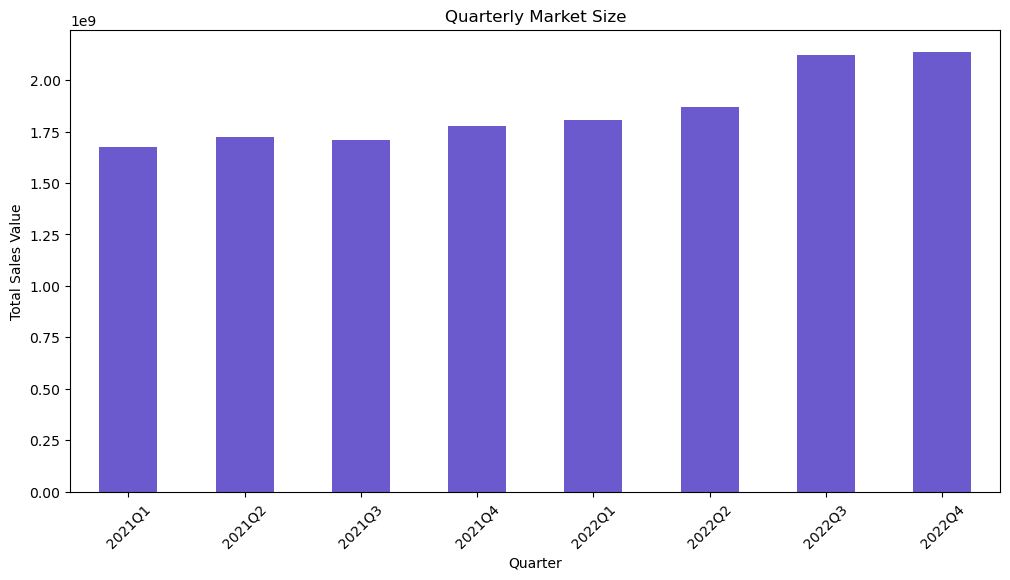

In [243]:
#Quarterly Market Size

# Create a 'Quarter' column
data['Quarter'] = data['Period'].dt.to_period('Q')

# Aggregate sales value by quarter
quarterly_market_size = data.groupby('Quarter')['Sales_Value'].sum()

# Bar chart for quarterly market size
plt.figure(figsize=(12, 6))
quarterly_market_size.plot(kind='bar', color='slateblue')
plt.title('Quarterly Market Size')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()


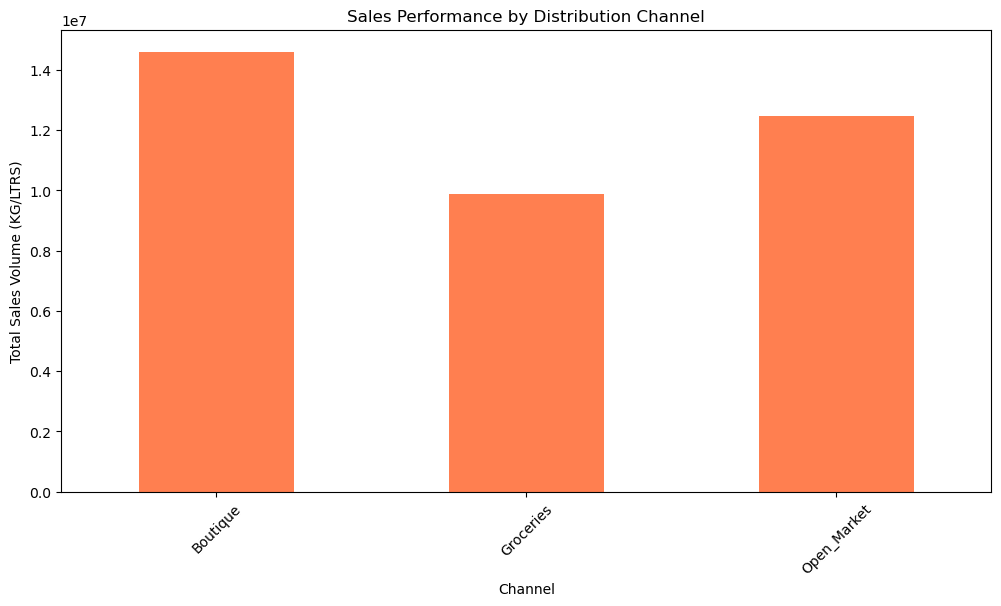

In [244]:
# Channel Performance 
# Aggregate sales volume by channel
channel_sales = data.groupby('Channel')['Sales_Volume(KG_LTRS)'].sum()

# Bar chart for channel performance
plt.figure(figsize=(12, 6))
channel_sales.plot(kind='bar', color='coral')
plt.title('Sales Performance by Distribution Channel')
plt.xlabel('Channel')
plt.ylabel('Total Sales Volume (KG/LTRS)')
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


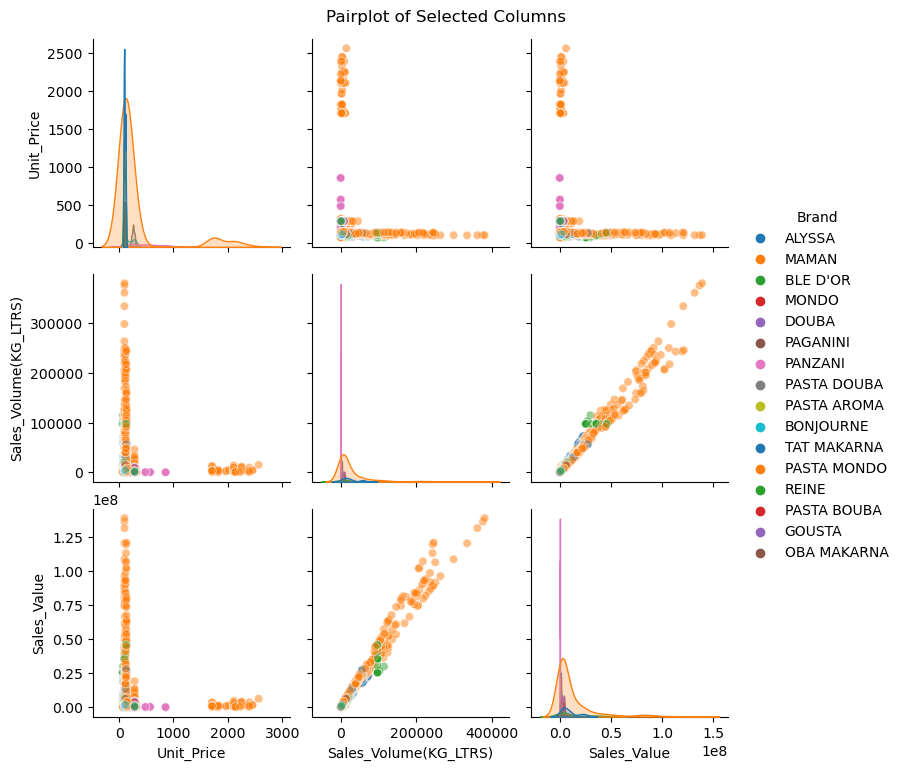

In [245]:
# Select a subset of columns for the pairplot (considering computational limits)
columns = ['Unit_Price', 'Sales_Volume(KG_LTRS)', 'Sales_Value', 'City', 'Category', 'Brand']

# Create a pairplot
sns.pairplot(data[columns], hue='Brand', diag_kind='kde', palette='tab10', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()